<a href="https://colab.research.google.com/github/jpescobarn/AnaliticaDatos/blob/master/multivariateNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificadores 
## Tomás Giraldo Agudelo
## Juan Pablo Escobar Naranjo

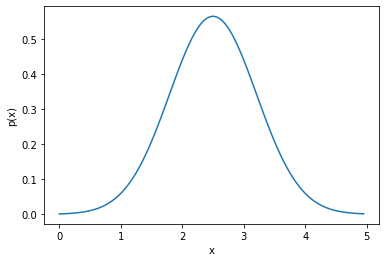

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np
from scipy.stats import multivariate_normal as mn
 
x = np.linspace(0, 5, 100, endpoint=False)
y = mn.pdf(x, mean=2.5, cov=0.5)
plt.xlabel('x')
plt.ylabel('p(x)')
 
plt.plot(x, y)

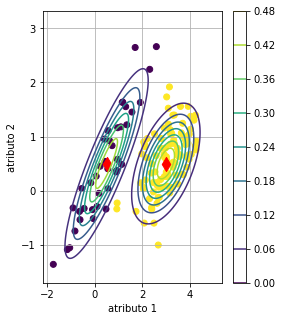

In [110]:
#clase 1 
mu1 = np.array([0.5,0.5]) #.fit -> estimar la mu1
cov1 = np.array([[0.8, 0.7],[0.7,0.8]]) #.fit -> estimar la cov1
N1 = 40 # numero puntos c1 -> estimar desde etiquetas
pdf1 = mn(mu1, cov1) # objeto scipy ara evaluar o muestrear gaussiana multivariada
 
 
#clase 2
mu2 = np.array([3,0.5]) #.fit -> estimar la mu1
cov2 = np.array([[0.5, 0.2],[0.2,0.3]]) #.fit -> estimar la cov1
N2 = 100 # numero puntos c1 -> estimar desde etiquetas
pdf2 = mn(mu2, cov2) # objeto scipy ara evaluar o muestrear gaussiana multivariada
 
X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)] # muestrear de las dos pdfs los datos (NO hacer esto-los datos X los ingresa el usuario)
y = np.r_[-1.0*np.ones((N1,1)),np.ones((N2,1))] #etiquetas, -1 y +1 para el problema binario
 
#myclass_cBayes().fit(Xtrain,ytrain), Xtrain Ntrain x P,  ytrain Ntrain
 
xx, yy = np.mgrid[1.25*min(X[:,0]):1.25*max(X[:,0]):.01, 1.25*min(X[:,1]):1.25*max(X[:,1]):.01] #graficar pdf en espacio de caract. 2D
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy
 
plt.figure(figsize=(4,5))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(mu1[0],mu1[1], c='r', marker='d',s = 100)
plt.scatter(mu2[0],mu2[1], c='r', marker='d',s = 100)
plt.contour(xx, yy, pdf1.pdf(pos))
plt.contour(xx, yy, pdf2.pdf(pos))
plt.colorbar()
plt.grid()
plt.xlabel('atributo 1')
plt.ylabel('atributo 2')
plt.show()

In [111]:
x.shape + (2,)

(100, 2)

$$\Sigma_c = \begin{bmatrix} \sigma^{c,2}_1 & cov^c(1,2) & \cdots & cov^c(1,P)\\
cov^c(2,1) & \sigma^{c,2}_2 & \cdots & cov^c(2,P)\\
\vdots   & \vdots & \ddots & \vdots \\
cov^c(P,1) & cov^c(P,2) & \cdots & \sigma^{c,2}_P
\end{bmatrix}$$

In [112]:
pdf1.pdf(mu1)

0.4109362960409998

In [113]:
#mu1 = np.array([0.2,0.5])
#cov1 = np.array([[0.5, 0.3],[-0.3,0.2]])
#N1 = 100
#rv1 = mn(mu1, cov1)

In [114]:
#rv1.rvs(size=100)

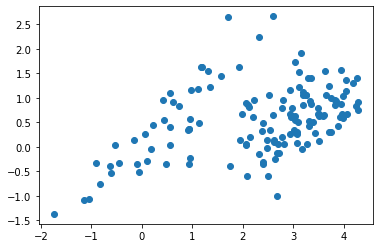

In [115]:
ye = np.c_[pdf1.pdf(X),pdf2.pdf(X)] #transform -> evaluar pdf despues de encontrar mu_c y Cov_c
 
plt.scatter(X[:,0],X[:,1])#,c=ye.argmax(axis=1))

(754, 504, 2)


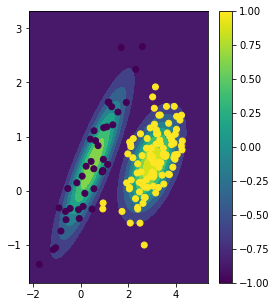

In [116]:
# predict
dc1 = pdf1.pdf(pos) # pdf1.pdf(Xtest)
dc2 = pdf2.pdf(pos) # pdf2.pdf(Xtest)
pb = np.zeros((dc1.shape[0],dc2.shape[1],2))
pb[:,:,0] = dc1 #* (N1/X.shape[0]) #marginal cada clase
pb[:,:,1] = dc2 #* (N2/X.shape[0])
#ytest_e = pb.argmax(axis=2) # etiquetas estimadas
 
print(pb.shape)
plt.figure(figsize=(4,5))
plt.contourf(xx, yy,pb.max(axis=2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.colorbar()

In [117]:
pb.shape

(754, 504, 2)

In [118]:
X.shape

(140, 2)

In [119]:
y.shape

(140, 1)

In [120]:
clases = np.unique(y)
nc = len(clases)

In [121]:
marginal = np.zeros((nc))
medias = np.zeros((nc,X.shape[1]))
varianzas = np.zeros((nc,X.shape[1]))
j=0
for c in clases:
  marginal[j]=sum(y==c)/len(y)
  medias[j] = X[(y==c).reshape(-1)].mean(axis=0)
  varianzas[j] = X[(y==c).reshape(-1)].var(axis=0)
  j+=1

In [122]:
marginal

array([0.28571429, 0.71428571])

In [123]:
medias

array([[0.46700508, 0.48582072],
       [3.06533887, 0.57579334]])

In [124]:
varianzas

array([[0.91374151, 0.94512936],
       [0.48906861, 0.30164595]])

#Clasificador Bayesiano Ingenuo 





$P(X,A)= \
\prod_{j=1}^{p} P(x_{j}|A)P(A)  
\ $

$P(X,B)= \
\prod_{j=1}^{p} P(x_{j}|B)P(B)  
\ $

In [125]:
xsize = len(X)
resultA = np.zeros(xsize)
resultB = np.zeros(xsize)
yfinal = np.zeros(xsize)

for i in range(xsize):
  pA1 = mn.pdf(X[i,0],mean=medias[0,0],cov=varianzas[0,0])*marginal[0]
  pA2 = mn.pdf(X[i,1],mean=medias[0,1],cov=varianzas[0,1])*marginal[0]
  pB1 = mn.pdf(X[i,0],mean=medias[1,0],cov=varianzas[1,0])*marginal[1]
  pB2 = mn.pdf(X[i,1],mean=medias[1,1],cov=varianzas[1,1])*marginal[1]
  resultA[i] = pA1*pA2
  resultB[i] = pB1*pB2
  if resultA[i] >=  resultB[i]:
    yfinal[i]=-1
  else:
    yfinal[i]=1

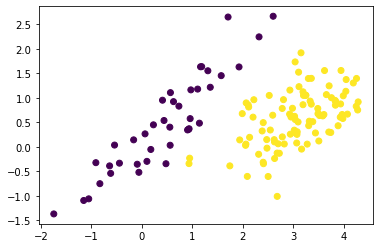

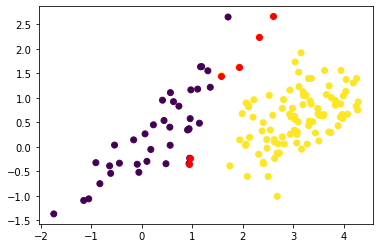

In [126]:
ind = y.reshape(-1)!=yfinal.reshape(-1)
ind.shape
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
plt.scatter(X[:,0], X[:,1], c = yfinal)
plt.scatter(X[ind,0], X[ind, 1], c = 'r')

## Bayes Gaussiano Cuadrático

$R(x) = -\frac{1}{2}(x-\mu_{A})^{T}\Sigma^{-1}_{A}(x-\mu_{A})+\frac{1}{2}(x-\mu_{B})^{T}\Sigma^{-1}_{B}(x-\mu_{B}) - \frac{1}{2} \log(|\Sigma_{A}|)+\frac{1}{2}\log(|\Sigma_{B}|) - \log\left(\frac{P(B)}{P(A)}\right) $


In [127]:
muA = np.mean(X[(y==1).reshape(-1)],axis=0)
muB = np.mean(X[(y==-1).reshape(-1)],axis=0)

print(muA,muB)
covarianzaA = np.cov(X[(y==1).reshape(-1)].T)
covarianzaB = np.cov(X[(y==-1).reshape(-1)].T)

ICovA = np.linalg.inv(covarianzaA)
ICovB = np.linalg.inv(covarianzaB)

priorA = sum(y==1)/len(y)
priorB = sum(y==-1)/len(y)


Xnew2 = X[10]

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import mahalanobis

cte = -0.5*np.log(np.linalg.det(covarianzaA))+0.5*np.log(np.linalg.det(covarianzaB))-np.log(priorB/priorA)

y_predict_cuadratico = np.zeros(xsize)
i=0
for xnews in X:
  Rx = -0.5*mahalanobis(xnews,muA,ICovA)+0.5*mahalanobis(xnews,muB,ICovB) + cte
  if  Rx > 0:
    y_predict_cuadratico[i]=1
  else:
    y_predict_cuadratico[i]=-1

  i+=1


[3.06533887 0.57579334] [0.46700508 0.48582072]


In [128]:
y_predict_cuadratico.shape

(140,)

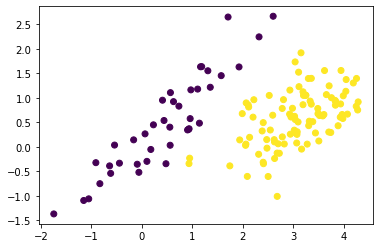

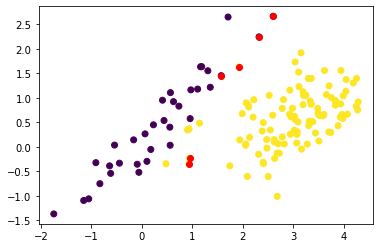

In [129]:
ind2 = y.reshape(-1)!=y_predict_cuadratico.reshape(-1)
ind2.shape
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
plt.scatter(X[:,0], X[:,1], c = y_predict_cuadratico)
plt.scatter(X[ind,0], X[ind, 1], c = 'r')